# Final Project - What is the Best Indicator of Success on the PGA Tour?
Max Guryan
DS 2023
## Notebook 2: Data Exploration and Normalization
Now that we have a cleaned dataset, we can begin exploring the data to understand what it can tell us about the success of a golfer on the PGA TOUR. In this notebook, we will normalize the data and perform an exploratory data analysis (EDA) to identify patterns and relationships between the features and the target variable, Money Earned and Scoring Average (a.k.a Success).

### Setting Up the Notebook:
In order to get us back on the same page as Notebook 1, run the cells below.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
PGA = pd.read_csv('data/processed/master_player_seasons.csv')

In [20]:
COLS = pd.DataFrame(index=PGA.columns)
COLS.index.name = 'col_id'
COLS['dtypes'] = PGA.dtypes
COLS['n_unique'] = PGA.nunique()
COLS["tot_observations"] = len(PGA)
COLS["na_count"] = PGA.isna().sum()

COLS

,dtypes,n_unique,tot_observations,na_count
col_id,,,,
year,int64,19,4839,0
player_name,object,806,4839,0
sg_total,float64,1917,4839,1258
sg_off_the_tee,float64,1323,4839,1258
sg_approach,float64,1364,4839,1258
sg_around_green,float64,958,4839,1258
sg_putting,float64,1306,4839,1258
driving_distance,float64,484,4839,1258
driving_accuracy,float64,1671,4839,1258


In [21]:
PGA_clean = PGA.copy().dropna()

In [22]:
COLS_clean = pd.DataFrame(index=PGA_clean.columns)
COLS_clean.index.name = 'col_id'
COLS_clean['dtypes'] = PGA_clean.dtypes
COLS_clean['n_unique'] = PGA_clean.nunique()
COLS_clean["tot_observations"] = len(PGA_clean)
COLS_clean["na_count"] = PGA_clean.isna().sum()
COLS_clean

,dtypes,n_unique,tot_observations,na_count
col_id,,,,
year,int64,19,3218,0
player_name,object,670,3218,0
sg_total,float64,1762,3218,0
sg_off_the_tee,float64,1251,3218,0
sg_approach,float64,1296,3218,0
sg_around_green,float64,925,3218,0
sg_putting,float64,1250,3218,0
driving_distance,float64,477,3218,0
driving_accuracy,float64,1591,3218,0


In [23]:
PGA_clean.head(20)

col_id,year,player_name,sg_total,sg_off_the_tee,sg_approach,sg_around_green,sg_putting,driving_distance,driving_accuracy,greens_in_regulation,scoring_average,money_earned,final_season_rank,sg_tee_to_green
0,2007,Aaron Baddeley,1.064,0.152,-0.252,0.535,0.629,291.9,60.00,60.35,70.088,3441119.0,9.0,0.435
1,2007,Adam Scott,1.234,0.478,0.708,-0.081,0.129,300.9,59.17,65.44,70.008,3413185.0,12.0,1.105
2,2007,Alex Cejka,0.728,0.257,0.609,0.340,-0.479,288.9,68.08,69.44,70.437,868303.0,129.0,1.206
3,2007,Anders Hansen,-0.089,-0.224,0.335,-0.023,-0.176,280.7,66.95,62.85,70.856,461216.0,138.0,0.088
4,2007,Andrew Buckle,-0.265,-0.223,-0.280,0.077,0.161,294.7,58.14,62.52,71.443,513630.0,141.0,-0.426
5,2007,Anthony Kim,0.673,0.578,0.200,0.016,-0.121,302.4,60.79,65.35,70.128,1545195.0,44.0,0.794
7,2007,Arron Oberholser,1.183,0.125,0.300,0.396,0.362,285.5,61.70,62.25,69.807,1797458.0,33.0,0.821
9,2007,Bart Bryant,0.638,0.180,0.253,0.008,0.198,281.1,70.66,66.34,70.637,1167874.0,80.0,0.441
12,2007,Ben Curtis,-0.749,-0.030,-0.554,0.023,-0.188,277.1,67.37,60.56,71.582,772321.0,115.0,-0.561
14,2007,Bill Haas,0.408,0.443,0.063,-0.081,-0.018,302.7,62.93,65.98,70.653,967443.0,127.0,0.425


### Normalization
In order to ensure that each metric can be compared to the next, we need to normalize the data. This will format the data so that each feature has a mean of 0 and a standard deviation of 1. This will allow us to compare the features on the same scale, and ensure that no feature is given more weight than another due to its scale. However, we need to ensure that each feature is roughly normally distributed before we can normalize it.
This will be done through a series of boxplots and histograms.

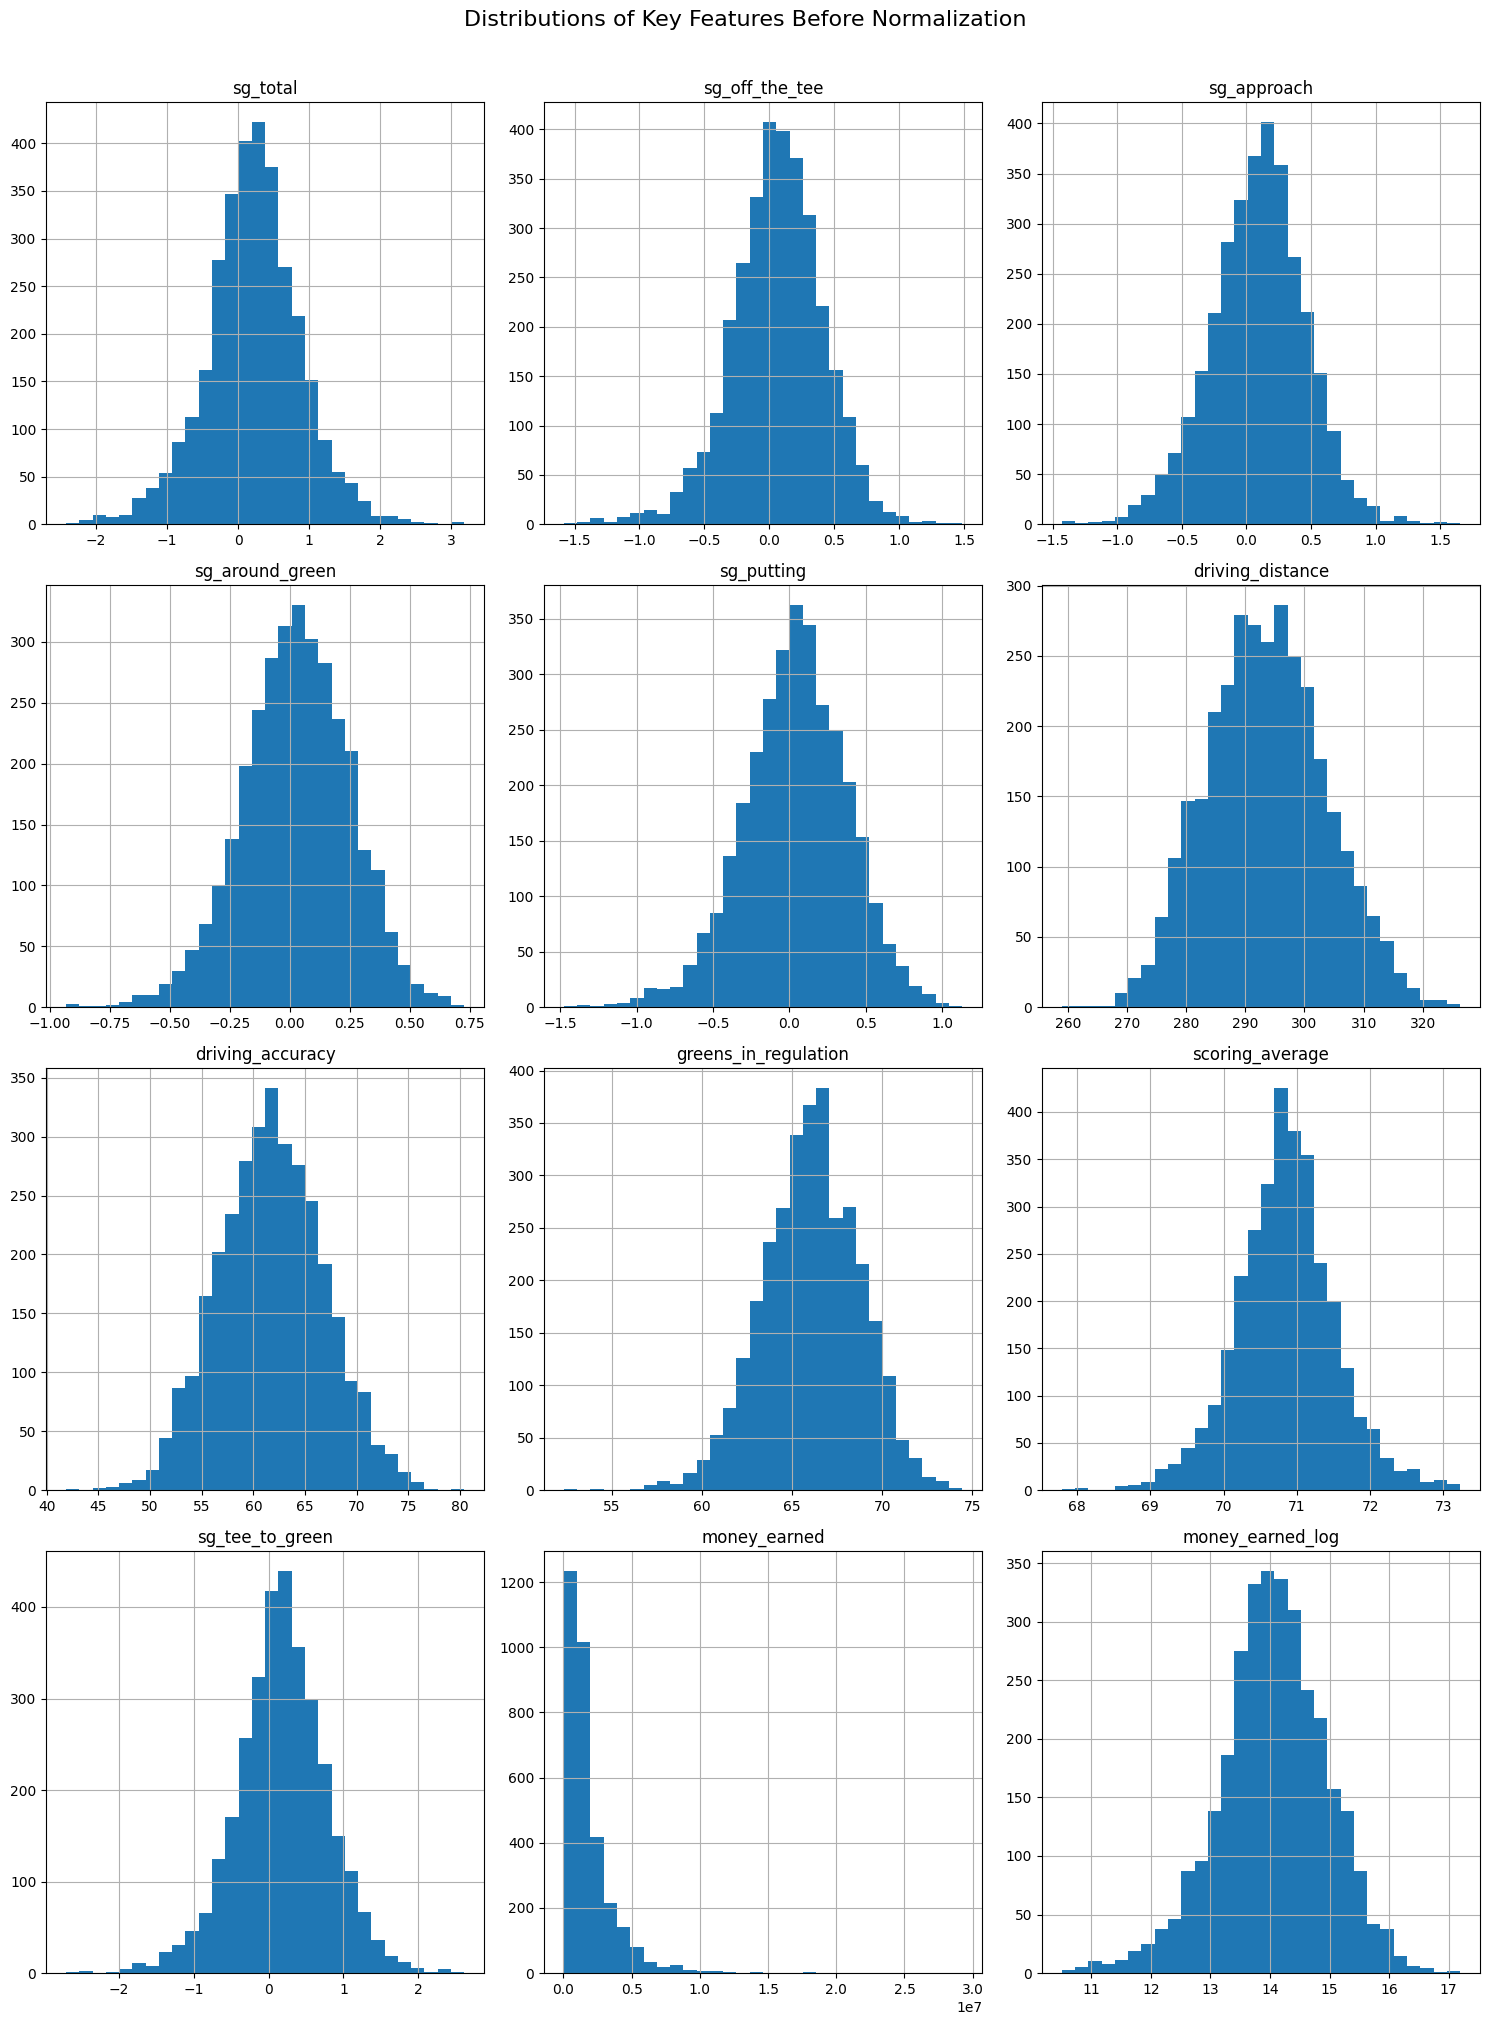

In [24]:
cols = [
    'sg_total', 'sg_off_the_tee', 'sg_approach',
    'sg_around_green', 'sg_putting', 'driving_distance', 'driving_accuracy',
    'greens_in_regulation', 'scoring_average',
    'sg_tee_to_green', 'money_earned', 'money_earned_log'
    ]
PGA_clean["money_earned_log"] = np.log1p(PGA_clean["money_earned"])
PGA_clean[cols].hist(bins=30, figsize=(15,20))
plt.suptitle('Distributions of Key Features Before Normalization', fontsize=16, y=1.01)
plt.tight_layout()
plt.show()

Looking at the figure above, each feature is unimodal, unskewed, and roughly normally distributed. Therefore, we can proceed with normalizing the data. The only exception is Money Earned, which is extremely right-skewed. In order to normalize this feature, we applied a log transformation. This will help to reduce the skewness caused by extreme outliers and make the distribution more normal.

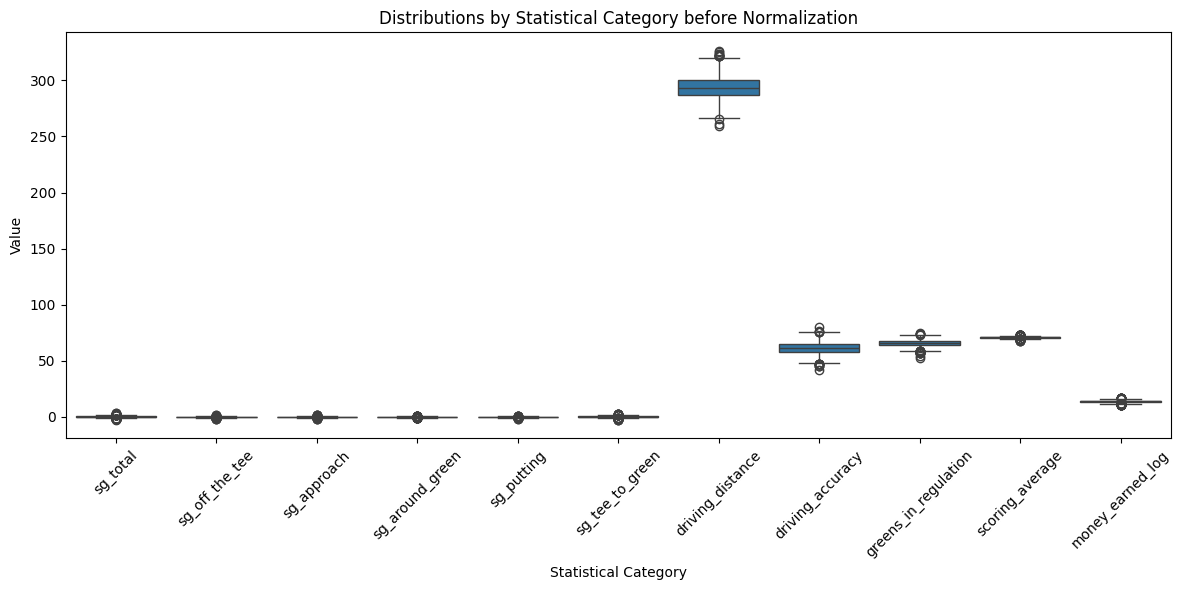

In [25]:
cols = [
    "sg_total","sg_off_the_tee","sg_approach","sg_around_green",
    "sg_putting","sg_tee_to_green","driving_distance",
    "driving_accuracy","greens_in_regulation","scoring_average", 'money_earned_log'
]

PGA_clean_long = PGA_clean[cols].melt(var_name="metric", value_name="value")

plt.figure(figsize=(12,6))
sns.boxplot(data=PGA_clean_long, x="metric", y="value")
plt.xticks(rotation=45)
plt.title("Distributions by Statistical Category before Normalization")
plt.ylabel("Value")
plt.xlabel("Statistical Category")
plt.tight_layout()
plt.show()


For reference, this is what is would look like if we were to compare the distributions of each feature before normalizaiton. The SG features have a range from -3 to 3, driving accuracy and greens in regualation range from 0 to 100, driving distance ranges from 200 to 350 and scoring average ranges from 65 to 80, and the log of money earned ranges from 0 to 12. Since these features are on different scales, we need to normalize them before we can compare them.

I used the z-score normalization method to normalize the data. This makes the values of each feature be represented in terms of the number of standard deviations away from the mean.

In [26]:
PGA_clean_z = PGA_clean.copy()
PGA_clean_z[cols] = PGA_clean_z[cols].apply(lambda s: (s - s.mean()) / s.std())
PGA_clean_z["money_earned_log_z"] = (PGA_clean_z["money_earned_log"] - PGA_clean_z["money_earned_log"].mean()) / PGA_clean_z["money_earned_log"].std()

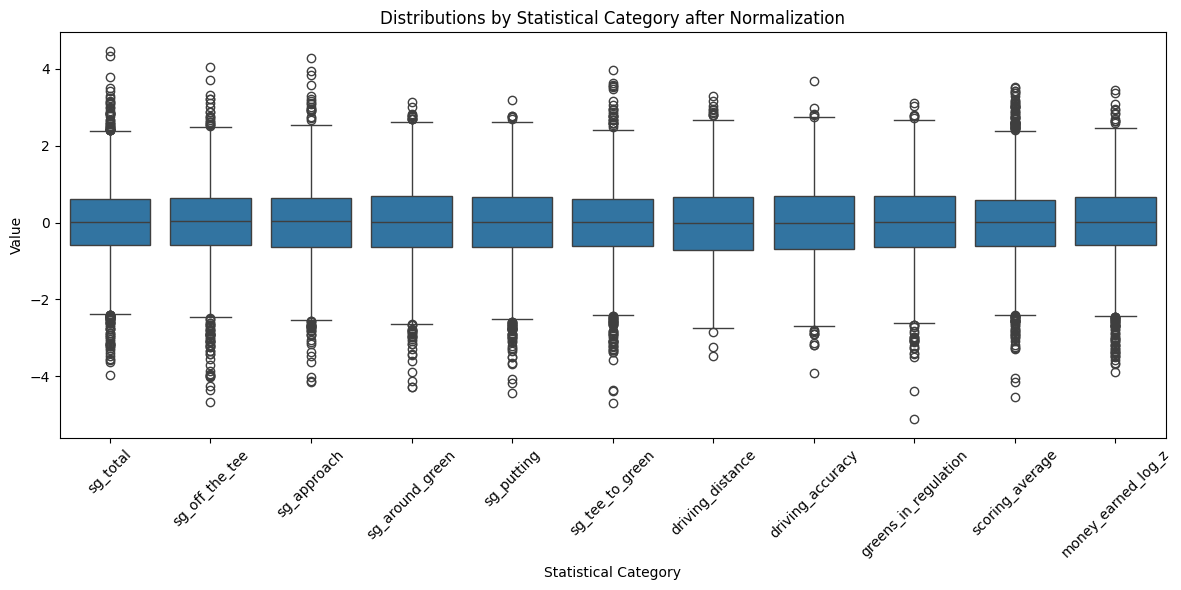

In [27]:
cols = [
    "sg_total","sg_off_the_tee","sg_approach","sg_around_green",
    "sg_putting","sg_tee_to_green","driving_distance",
    "driving_accuracy","greens_in_regulation","scoring_average", 'money_earned_log_z'
]

PGA_clean_z_long = PGA_clean_z[cols].melt(var_name="metric", value_name="value")

plt.figure(figsize=(12,6))
sns.boxplot(data=PGA_clean_z_long, x="metric", y="value")
plt.xticks(rotation=45)
plt.title("Distributions by Statistical Category after Normalization")
plt.ylabel("Value")
plt.xlabel("Statistical Category")
plt.tight_layout()
plt.show()

Now that the data is normalized, and each feature is on the same scale, we can safely compare a features relationship to Money Earned.

### Exploring Relationships Between Features and Money Earned
Our goal is to compare the strength of relationships between each feature and Money Earned. To do this, we will create a heatmap showing the relative strength of correlation between each feature and Money Earned. In order to do this, we need to confirm that each feature has a linear relationship with Money Earned. This will be done through a series of scatterplots with lines of best fit.

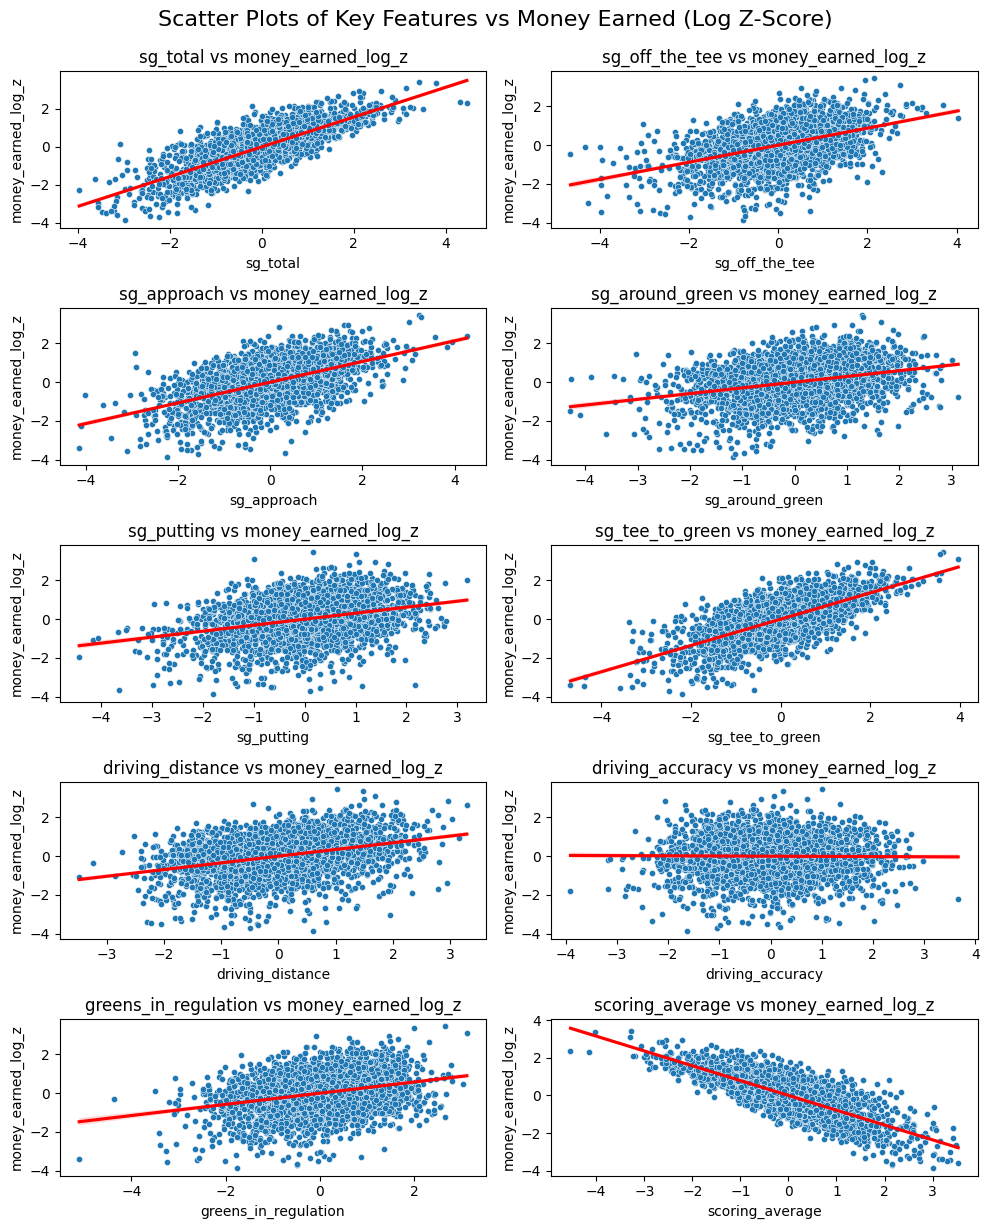

In [28]:
key = "money_earned_log_z"
cols = [
    "sg_total","sg_off_the_tee","sg_approach","sg_around_green",
    "sg_putting","sg_tee_to_green","driving_distance",
    "driving_accuracy","greens_in_regulation","scoring_average"
]

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10, 12))
axes = axes.flatten() 

for ax, col in zip(axes, cols):
    sns.scatterplot(data=PGA_clean_z, x=col, y=key, s=20, ax=ax)
    sns.regplot(data=PGA_clean_z, x=col, y=key, scatter=False, color='red', ax=ax)
    ax.set_title(f"{col} vs {key}", fontsize=12)


plt.tight_layout()
plt.suptitle("Scatter Plots of Key Features vs Money Earned (Log Z-Score)", fontsize=16, y=1.02)
plt.show()


Looking at the scatterplots above, we can see that each feature has a roughly linear relationship with Money Earned because the data points seem to be clustered in a linear trend. Therefore, we can safely proceed with creating the heatmap to compare the strength of these relationships.

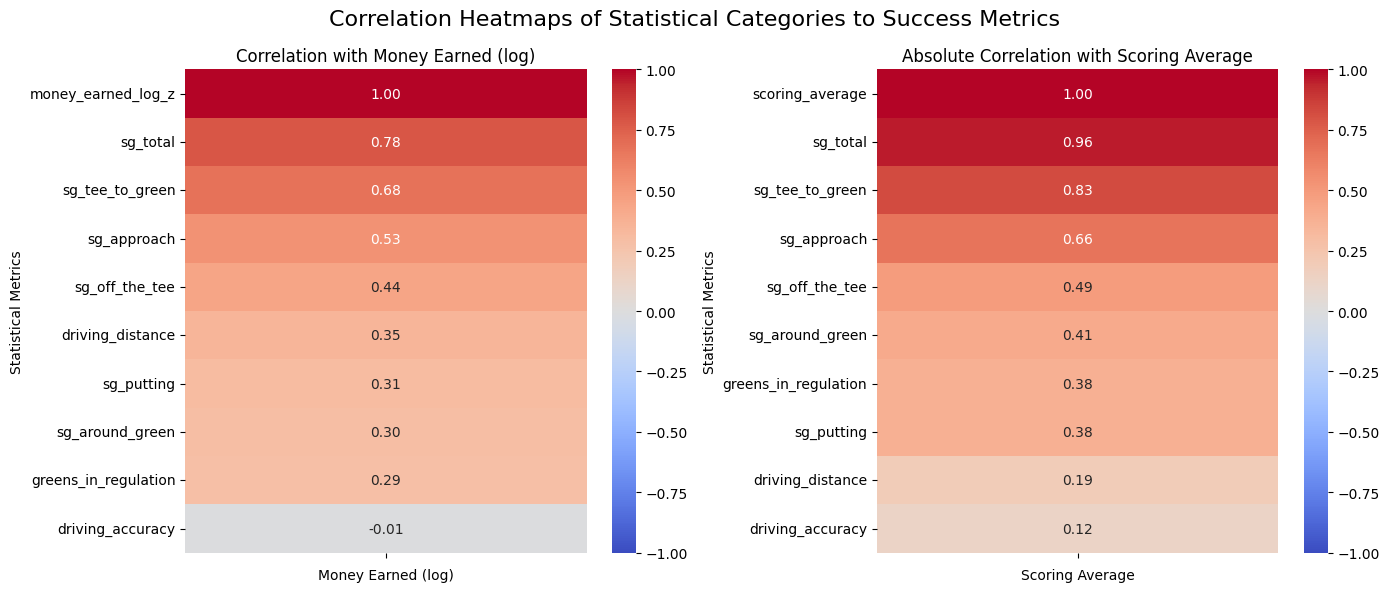

In [29]:
cols_money = [
    "money_earned_log_z","sg_total","sg_off_the_tee","sg_approach","sg_around_green",
    "sg_putting","sg_tee_to_green","driving_distance","driving_accuracy",
    "greens_in_regulation"
]
corr_money = PGA_clean_z[cols_money].corr()

cols_score = [
    "sg_total","sg_off_the_tee","sg_approach","sg_around_green",
    "sg_putting","sg_tee_to_green","driving_distance","driving_accuracy",
    "greens_in_regulation", "scoring_average"
]
corr_score = PGA_clean_z[cols_score].corr().abs()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(
    corr_money[["money_earned_log_z"]].sort_values(by="money_earned_log_z", ascending=False),
    annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, ax=axes[0]
)
axes[0].set_xticklabels([])
axes[0].set_title("Correlation with Money Earned (log)")
axes[0].set_ylabel("Statistical Metrics")
axes[0].set_xlabel("Money Earned (log)")
sns.heatmap(
    corr_score[["scoring_average"]].sort_values(by="scoring_average", ascending=False),
    annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, ax=axes[1]
)
axes[1].set_xticklabels([])
axes[1].set_title("Absolute Correlation with Scoring Average")
axes[1].set_ylabel("Statistical Metrics")
axes[1].set_xlabel("Scoring Average")
fig.suptitle("Correlation Heatmaps of Statistical Categories to Success Metrics",fontsize=16)
plt.tight_layout()
plt.show()


The two heatmaps above rank the strength of linear correlations between each feature and Money Earned (left) and Scoring Average (right). This can be used to identify which features are better indeicators of success on the PGA TOUR. However, it is hard to compare ranking between the two heatmaps to see if we get the same results for both success metrics. Analysis of this figure will be done in Notebook 3.

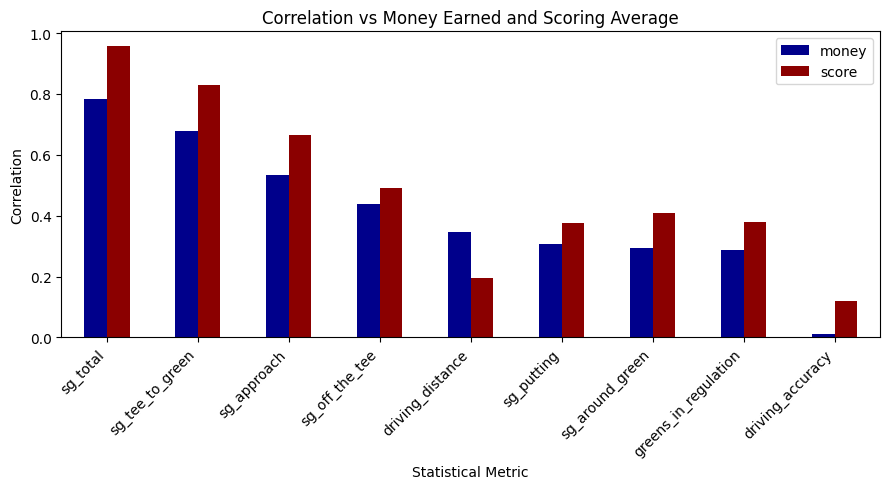

In [ ]:
cols = [
    "sg_total","sg_off_the_tee","sg_approach","sg_around_green","sg_putting",
    "sg_tee_to_green","driving_distance","driving_accuracy","greens_in_regulation",
]

money_col = "money_earned_log_z"
score_col = "scoring_average"
drop_cols = [money_col, score_col]

sub = PGA_clean_z[cols + drop_cols].select_dtypes("number")
corr = sub.corr()

corr_money = corr[money_col].drop(drop_cols).abs()
corr_score = corr[score_col].drop(drop_cols).abs()

PGA_corr = (
    pd.concat([corr_money, corr_score], axis=1)
      .rename(columns={money_col: "money", score_col: "score"})
      .rename_axis("metric")
      .reset_index()
      .sort_values("money", ascending=False)
)

ax = PGA_corr.plot(
    x="metric",
    kind="bar",
    figsize=(9, 5),
    color=["darkblue", "darkred"],
)

ax.set_xlabel("Statistical Metric")
ax.set_ylabel("Correlation")
ax.set_title("Correlation vs Money Earned and Scoring Average")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


The use of a grouped bar chart allows us to see the same information, but in a way that is easier to compare between the two success metrics. However, it is harder to see exact correlation values for each feature. The combination of these two figures is a great way to visualize all aspects of the corelation data. Analysis of this figure will be done in Notebook 3.

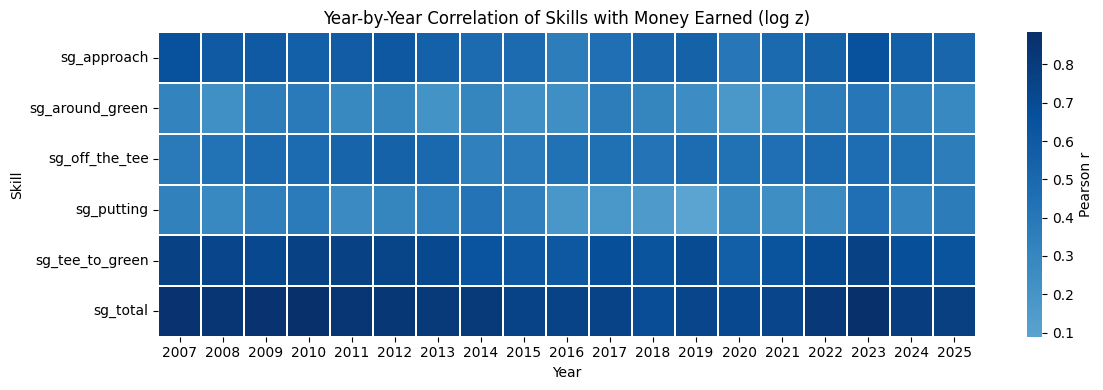

In [54]:
skills = ["sg_off_the_tee","sg_approach","sg_around_green","sg_putting","sg_tee_to_green","sg_total"]

rows = []
for yr, g in PGA_clean_z.groupby("year"):
    c = g[skills + ["money_earned_log_z"]].corr().loc[skills, "money_earned_log_z"]
    for metric, val in c.items():
        rows.append({"year": yr, "metric": metric, "corr": val})

corr_by_year = pd.DataFrame(rows)
corr_pivot = corr_by_year.pivot(index="metric", columns="year", values="corr")

plt.figure(figsize=(12, 4))
sns.heatmap(corr_pivot, cmap="Blues", center=0, linewidths=0.3, cbar_kws={"label": "Pearson r"})
plt.title("Year-by-Year Correlation of Skills with Money Earned (log z)")
plt.xlabel("Year"); plt.ylabel("Skill")
plt.tight_layout()
plt.show()
